PROJECT NAME : EXPENSE AND BUDJET RECORD SYSTEM


CODE FOR BLUEGHOST PROJECT 

In [8]:
import pymysql

In [9]:
mypr=pymysql.connect(
    host="localhost",
    port=3306,
    user="root",
    password="program456"
)
mycursor=mypr.cursor()

In [10]:
mycursor.execute("show databases")
for x in mycursor:
    print(x)

('book_entry',)
('books_entry',)
('career',)
('cocacola',)
('expenbudget',)
('expenserec',)
('information_schema',)
('jamb',)
('library_entry',)
('money',)
('mysql',)
('newschema',)
('performance_schema',)
('sakila',)
('student_performance',)
('sys',)
('world',)


In [ ]:
mycursor.execute("create database expenserec")
for x in mycursor:
    print(x)

In [ ]:
mycursor.execute("use expenserec")
mycursor.execute("create table salesrecords(id int primary key not null,date datetime(6) not null,category varchar(15) not null,item varchar(20) not null,amount int not null,payment varchar(10) not null,status varchar(7) not null)")
for x in mycursor:
    print(x)  

In [ ]:
mycursor.execute("use expenserec")
def records():
    id=int(input("Enter the sales id:: "))
    date=input("Enter date of purchase:: ")
    category=input("Enter catergory of item bought:: ")
    item=input("Enter product purchased::")
    amount=int(input("Enter price of item purchased:: "))
    payment=input("Enter method of payment:: ")
    status=input("Enter whether payment is made or not:: ")
    query="insert into salesrecords(id,date,category,item,amount,payment,status) values(%s,%s,%s,%s,%s,%s,%s)"
    mycursor.execute(query,(id,date,category,item,amount,payment,status))
    mypr.commit()
    print("Record inserted Succesfully.....")
def search_record():
    id=int(input("Enter sales id:: "))
    query = 'select * from salesrecords where id = "%s"'
    mycursor.execute(query,(id))
    results=mycursor.fetchall()
    if len(results)==0:
        print("RECORD DETAILS  NOT FOUND (404)......")
    else:
        for x in results:
            print(x)   
def display_record():
    mycursor.execute("select * from salesrecords")
    for x in mycursor:
        print(x)
def delete_record():
    id =int(input("Enter sales id::"))
    query="delete from salesrecords where id = '%s' "
    mycursor.execute(query(id))
    mypr.commit
def main():
    print("<<<<< Sales Inventory >>>>>")
    print("1.RECORD INSERT")
    print("2.SEARCH FOR SALES RECORDS")
    print("3.DISPLAY SALES RECORDS")
    print("4.DELETE SALES RECORDS")
    print("5.LOGOUT OF SALES RECORDS")
    while True:
        choice=input("Enter the selection number:: ")
        if choice == "1":
            records()
        elif choice == "2":
            search_record()
        elif choice == "3":
            display_record()
        elif choice == "4":
            delete_record()
        elif choice == "5":
            break
            print("SALES ENTRY SUCCESSFUL")

if __name__ == "__main__":
    main()


<<<<< Sales Inventory >>>>>
1.RECORD INSERT
2.SEARCH FOR SALES RECORDS
3.DISPLAY SALES RECORDS
4.DELETE SALES RECORDS
5.LOGOUT OF SALES RECORDS
Record inserted Succesfully.....
Record inserted Succesfully.....
Record inserted Succesfully.....
Record inserted Succesfully.....
Record inserted Succesfully.....
Record inserted Succesfully.....
Record inserted Succesfully.....
Record inserted Succesfully.....


CODE FOR CONVERTING DATA INTO CSV FORMAT FOR ANALYSIS


In [ ]:

import pandas as pd

mypr=pymysql.connect(
    host="localhost",
    port=3306,
    user="root",
    password="program456",
    database="expenserec"
)
mycursor=mypr.cursor() 



# Use pandas to read directly from SQL
query = "SELECT * FROM salesrecords"
df = pd.read_sql(query, mypr)


print(df)


df.to_csv("sample_entries.csv", index=False)

print("\nData exported to sample_entries.csv successfully!")


mypr.close()


    id       date    category         item  amount  payment  status
0    1 2001-01-26        food        lunch    2000     card    paid
1    2 2002-02-26   transport        train    1000    debit    paid
2    3 2003-03-26       bills  electricity    3000   credit  unpaid
3    4 2004-03-26        food       dinner    4000     card    paid
4    5 2005-03-26   transport        taxis    1700    debit    paid
5    7 2007-03-26       bills        water    7000   credit  unpaid
6    8 2008-03-26    personal        calls     700     card    paid
7    9 2009-03-26        food    breakfast    3450    debit    paid
8   10 2010-03-26   transport      waybill    8900   credit  unpaid
9   11 2011-03-26   transport        train    4500     card    paid
10  12 2012-04-26    trasport        train    9000    debit    paid
11  13 2013-04-26   transport        taxis    8900   credit  unpaid
12  14 2014-04-26   transport      waybill    4500     card    paid
13  15 2015-04-26    personal        calls     3

C:\Users\USER\AppData\Local\Temp\ipykernel_19780\1668293222.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mypr)


DATA RETRIVED AND UNDER GOES CLEANING 

In [ ]:
df=pd.read_csv("sample_entries.csv")


In [ ]:
df

,id,date,category,item,amount,payment,status
0,1,2001-01-26,food,lunch,2000,card,paid
1,2,2002-02-26,transport,train,1000,debit,paid
2,3,2003-03-26,bills,electricity,3000,credit,unpaid
3,4,2004-03-26,food,dinner,4000,card,paid
4,5,2005-03-26,transport,taxis,1700,debit,paid
5,7,2007-03-26,bills,water,7000,credit,unpaid
6,8,2008-03-26,personal,calls,700,card,paid
7,9,2009-03-26,food,breakfast,3450,debit,paid
8,10,2010-03-26,transport,waybill,8900,credit,unpaid
9,11,2011-03-26,transport,train,4500,card,paid


In [ ]:
df.isnull().sum()

id          0
date        0
category    0
item        0
amount      0
payment     0
status      0
dtype: int64

In [ ]:
df = df.drop(columns=["id"])
df

,date,category,item,amount,payment,status
0,2001-01-26,food,lunch,2000,card,paid
1,2002-02-26,transport,train,1000,debit,paid
2,2003-03-26,bills,electricity,3000,credit,unpaid
3,2004-03-26,food,dinner,4000,card,paid
4,2005-03-26,transport,taxis,1700,debit,paid
5,2007-03-26,bills,water,7000,credit,unpaid
6,2008-03-26,personal,calls,700,card,paid
7,2009-03-26,food,breakfast,3450,debit,paid
8,2010-03-26,transport,waybill,8900,credit,unpaid
9,2011-03-26,transport,train,4500,card,paid


In [ ]:
df["date"] = pd.date_range("2026-01-01", periods=len(df), freq="D")
df

,date,category,item,amount,payment,status
0,2026-01-01,food,lunch,2000,card,paid
1,2026-01-02,transport,train,1000,debit,paid
2,2026-01-03,bills,electricity,3000,credit,unpaid
3,2026-01-04,food,dinner,4000,card,paid
4,2026-01-05,transport,taxis,1700,debit,paid
5,2026-01-06,bills,water,7000,credit,unpaid
6,2026-01-07,personal,calls,700,card,paid
7,2026-01-08,food,breakfast,3450,debit,paid
8,2026-01-09,transport,waybill,8900,credit,unpaid
9,2026-01-10,transport,train,4500,card,paid


In [ ]:
df["date"] = df["date"].dt.date
df

,date,category,item,amount,payment,status
0,2026-01-01,food,lunch,2000,card,paid
1,2026-01-02,transport,train,1000,debit,paid
2,2026-01-03,bills,electricity,3000,credit,unpaid
3,2026-01-04,food,dinner,4000,card,paid
4,2026-01-05,transport,taxis,1700,debit,paid
5,2026-01-06,bills,water,7000,credit,unpaid
6,2026-01-07,personal,calls,700,card,paid
7,2026-01-08,food,breakfast,3450,debit,paid
8,2026-01-09,transport,waybill,8900,credit,unpaid
9,2026-01-10,transport,train,4500,card,paid


In [ ]:
df.to_csv("sales.csv", index=False)


In [2]:
import pandas as pd

ANALYSIS BEGINS!!!

In [3]:
df2=pd.read_csv("sales.csv")
df2




,date,category,item,amount,payment,status
0,2026-01-01,food,lunch,2000,card,paid
1,2026-01-02,transport,train,1000,debit,paid
2,2026-01-03,bills,electricity,3000,credit,unpaid
3,2026-01-04,food,dinner,4000,card,paid
4,2026-01-05,transport,taxis,1700,debit,paid
5,2026-01-06,bills,water,7000,credit,unpaid
6,2026-01-07,personal,calls,700,card,paid
7,2026-01-08,food,breakfast,3450,debit,paid
8,2026-01-09,transport,waybill,8900,credit,unpaid
9,2026-01-10,transport,train,4500,card,paid


Using Python (preferably with Pandas), analyze the data to find: 
  1. The category with the highest total spending 
  2. The percentage of total expenses by each payment type 
  3. The total amount still unpaid (on credit) 
  4. The item that costs the most overall 
  5. The total spending by month
This is the analysis expected to be carried out in this project

In [ ]:
import numpy as np

In [ ]:
category_spending = df2.groupby("category")["amount"].sum() 
max_category = category_spending.max()
highest_spending = category_spending.max() 
print("Category with highest total spending:", max_category) 
print("Amount spent:", highest_spending)

##Category with the highest spending

Category with highest total spending: bills
Amount spent: 443530


In [11]:
# 2. Percentage of total expenses by each payment type
payment_percentage = (df2.groupby("payment")["amount"].sum() / df2["amount"].sum()) * 100
payment_percentage=payment_percentage.round(2)
print("Percentages of total expenses incurred by distinct payment method")
print(payment_percentage)


Percentages of total expenses incurred by distinct payment method
payment
card       11.32
credit     76.18
credit      5.23
debit       7.26
Name: amount, dtype: float64


In [ ]:
# 3. Total amount still unpaid (on credit)
# Assuming 'status' column marks unpaid as "Pending" or "Credit"

unpaid_credit = df2.loc[df2["status"] == "unpaid", "amount"].sum()
print("Total unpaid amount:", unpaid_credit)


Total unpaid amount: 528630


In [23]:
##4.The item that costs the most overall

item_spending = df2.groupby("item")["amount"].sum() 
highest_item = item_spending.max()
highest_amount = item_spending.max()
print("Item with highest overall cost:", highest_item) 
print("Total amount spent on this item:", highest_amount)

Item with highest overall cost: 356070
Total amount spent on this item: 356070


In [29]:
##5. The total spending by month
# Group by month and sum spending 

df2["date"] = pd.to_datetime(df2["date"])
monthly_spending = df2.groupby(df2["date"].dt.to_period("M"))["amount"].sum() 
print("Total spending by month:") 
print(monthly_spending)

Total spending by month:
date
2026-01    519514
2026-02    130230
Freq: M, Name: amount, dtype: int64


In [31]:
##Average spending per item
avg_spending_per_category = df2.groupby("category")["amount"].mean().round(2) 
print("Average spending per category:") 
print(avg_spending_per_category)

Average spending per category:
category
bills         34117.69
food           4075.00
personal       8561.40
transport      5337.50
transport      3400.00
trasport       9000.00
Name: amount, dtype: float64


In [34]:
#Most frequent payment method

payment_avg = df2["payment"].value_counts() 
 
frequent_payment = payment_avg.idxmax()
frequency = payment_avg.max()
print("Most frequent payment method:", frequent_payment) 
print("Number of transactions:", frequency)

Most frequent payment method: credit
Number of transactions: 22


CREATING VISUALIZATIONS USING PYTHON LIBRARIES LIKE MATPLPOTLIB,SEABORN AND PLOTLY EXPRESS


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


C:\Users\USER\AppData\Local\Temp\ipykernel_19984\1350748148.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




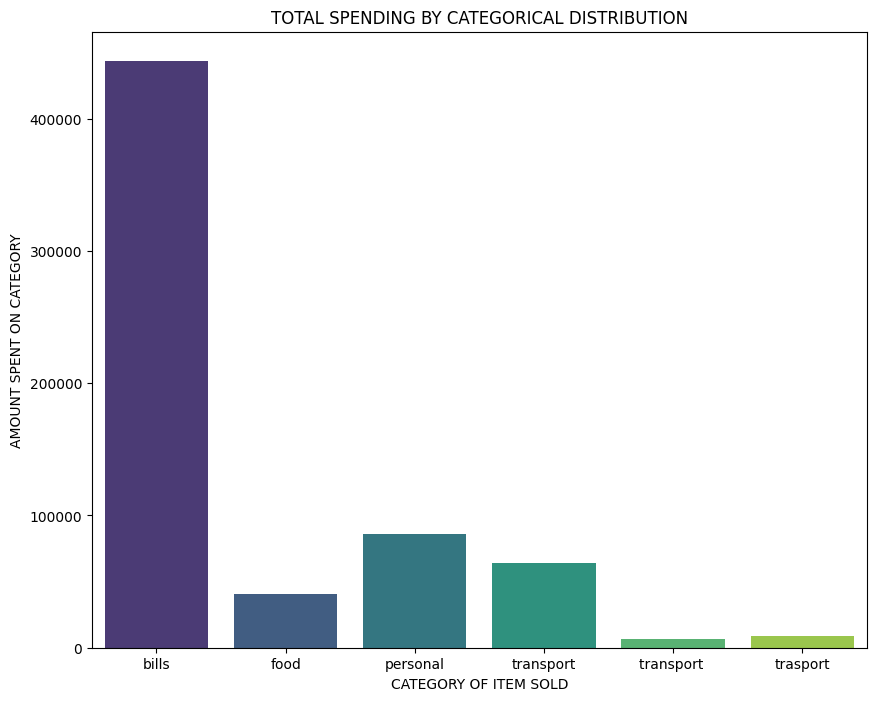

In [38]:

# 1. Spending by category (bar chart) 
category_amount = df2.groupby("category")["amount"].sum().sort_values(ascending=False)
plt.figure(figsize=(10,8)) 
sns.barplot(x=category_spending.index, y=category_spending.values, palette="viridis",)
plt.title("TOTAL SPENDING BY CATEGORICAL DISTRIBUTION") 
plt.ylabel("AMOUNT SPENT ON CATEGORY")
plt.xlabel("CATEGORY OF ITEM SOLD")  
plt.show()

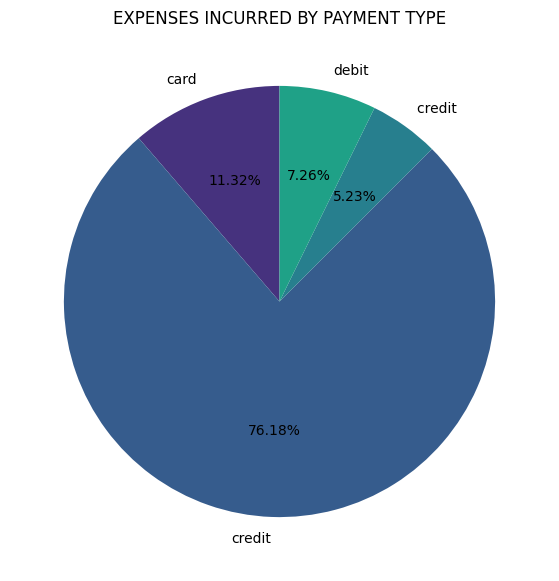

In [ ]:
# 2. Expense distribution by payment type (pie chart)
payment_spending = df2.groupby("payment")["amount"].sum() 
plt.figure(figsize=(10,7))
plt.pie(payment_spending, labels=payment_spending.index,autopct="%1.2f%%",startangle=90, colors=sns.color_palette("viridis")) 
plt.title("EXPENSES INCURRED BY PAYMENT TYPE")
plt.show()

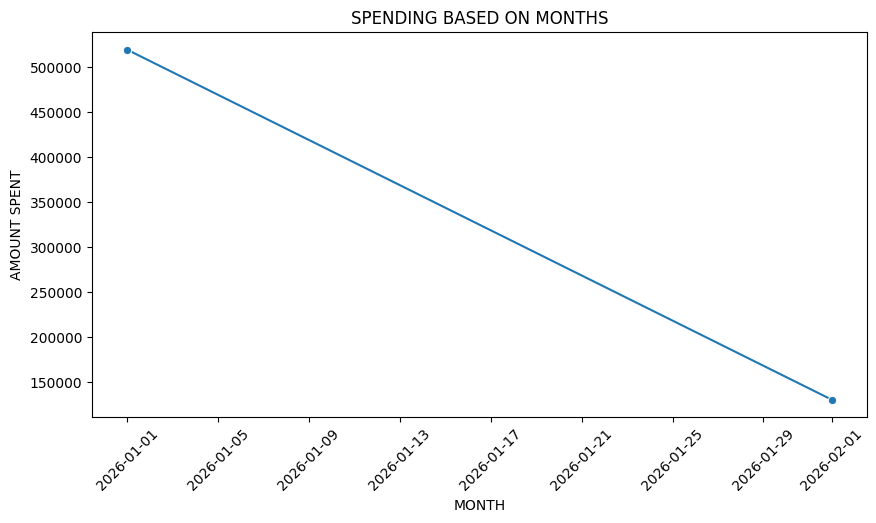

In [48]:
monthly_spending = df2.groupby(df2["date"].dt.to_period("M"))["amount"].sum() 

monthly_spending.index = monthly_spending.index.to_timestamp()
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_spending.index, y=monthly_spending.values, marker="o") 
plt.title("SPENDING BASED ON MONTHS") 
plt.ylabel("AMOUNT SPENT") 
plt.xlabel("MONTH") 
plt.xticks(rotation=45) 
plt.show()

##Amount Spent based on Month